In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
data=pd.read_csv("letter-recognition.data",header=None)

In [94]:
data[0]=data[0].apply(lambda x: ord(x)-ord('A'))

In [96]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [48]:
y=to_categorical(y,num_classes=26)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [60]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(26,activation='softmax')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [66]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.2349 - loss: 2.7081 - val_accuracy: 0.6553 - val_loss: 1.2101
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.5763 - loss: 1.3564 - val_accuracy: 0.7322 - val_loss: 0.9137
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.6512 - loss: 1.0940 - val_accuracy: 0.7731 - val_loss: 0.7800
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.6930 - loss: 0.9605 - val_accuracy: 0.8009 - val_loss: 0.6855
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.7178 - loss: 0.8962 - val_accuracy: 0.8219 - val_loss: 0.6227
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.7405 - loss: 0.8396 - val_accuracy: 0.8344 - val_loss: 0.5740
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.7608 - loss: 0.7606 - val_accuracy: 0.8409 - val_loss: 0.5394
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.7725 - loss: 0.7145 - 

In [68]:
test_loss,test_accuracy=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.8705 - loss: 0.4452
Test Accuracy: 87.80%


In [74]:
predictions=model.predict(X_test)
y_pred = predictions.argmax(axis=1)
y_true = y_test.argmax(axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step


In [76]:
print("Classification Report : \n")
print(classification_report(y_true,y_pred,target_names=[chr(i) for i in range(ord('A'), ord('Z')+1)]))

Classification Report : 

              precision    recall  f1-score   support

           A       0.92      0.93      0.93       153
           B       0.74      0.91      0.82       139
           C       0.95      0.88      0.91       142
           D       0.84      0.84      0.84       166
           E       0.84      0.90      0.87       154
           F       0.84      0.85      0.84       156
           G       0.82      0.82      0.82       145
           H       0.92      0.71      0.80       146
           I       0.97      0.87      0.92       165
           J       0.95      0.87      0.91       132
           K       0.85      0.84      0.84       153
           L       0.97      0.91      0.94       166
           M       0.87      0.96      0.91       156
           N       0.92      0.90      0.91       143
           O       0.88      0.80      0.83       158
           P       0.93      0.92      0.92       173
           Q       0.88      0.95      0.91       161
 

In [78]:
model.save("ocr_multiclass_model.h5")

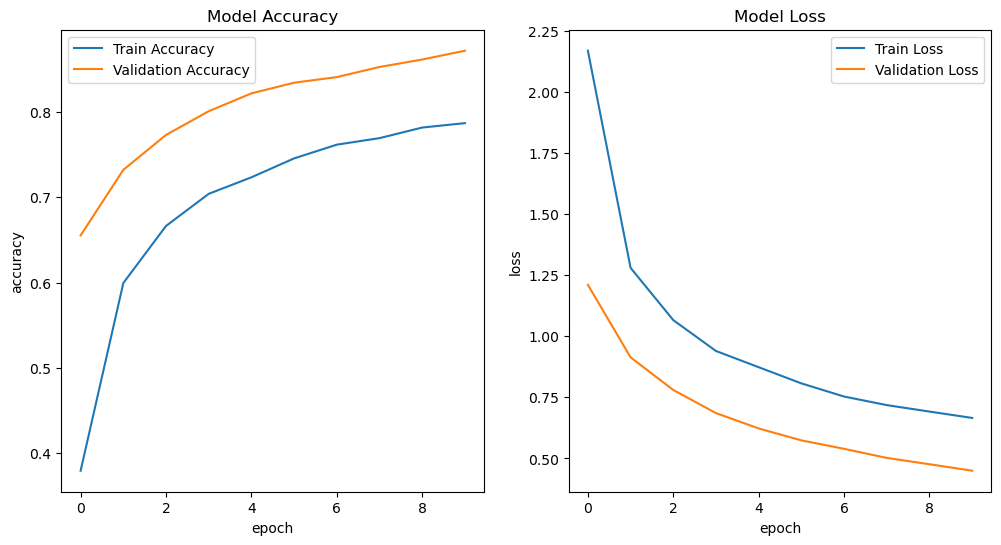

In [82]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()